In [145]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting._matplotlib import lag_plot
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
import pmdarima as pm

In [2]:
mySet = pd.read_csv('dataset_new.csv', parse_dates=[[0, 1, 2]])
mySet.head()

,year_mo_da,temp,max,min
0,1946-08-14,86.4,98.2,77.4
1,1946-08-15,85.3,98.2,76.3
2,1946-08-16,85.8,98.2,76.3
3,1946-08-17,86.0,98.2,75.4
4,1946-08-18,86.0,97.3,76.3


In [5]:
set1 = mySet[['year_mo_da', 'max']]
set1.set_index('year_mo_da', inplace=True)
set1.describe()

,max
count,27985.000000
mean,87.360954
std,244.754329
min,21.900000
25%,73.000000
50%,82.900000
75%,91.900000
max,9999.900000


In [6]:
set1 = set1[set1['max'] < 150]
set1.describe()

,max
count,27968.000000
mean,81.335741
std,13.322669
min,21.900000
25%,73.000000
50%,82.900000
75%,91.900000
max,111.000000


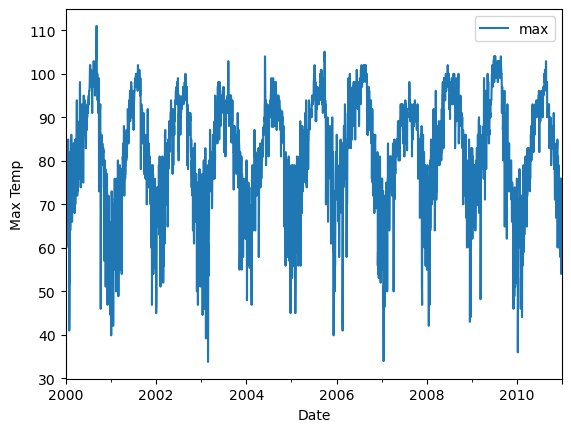

In [8]:
set1['2000':'2010'].plot()
plt.xlabel('Date')
plt.ylabel('Max Temp')
plt.show()

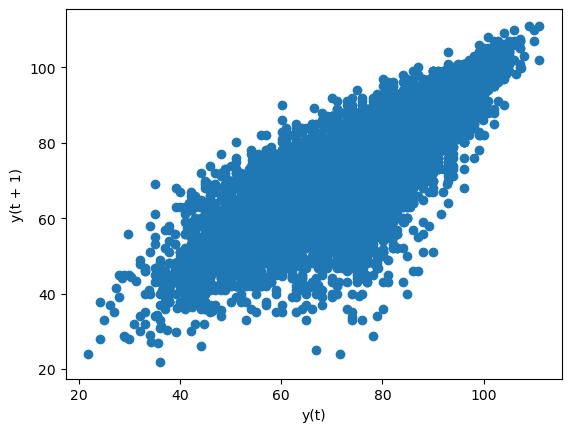

In [11]:
lag_plot(set1)
plt.show()

In [13]:
values = pd.DataFrame(set1.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
res = df.corr()
print(res)

          t-1       t+1
t-1  1.000000  0.905988
t+1  0.905988  1.000000


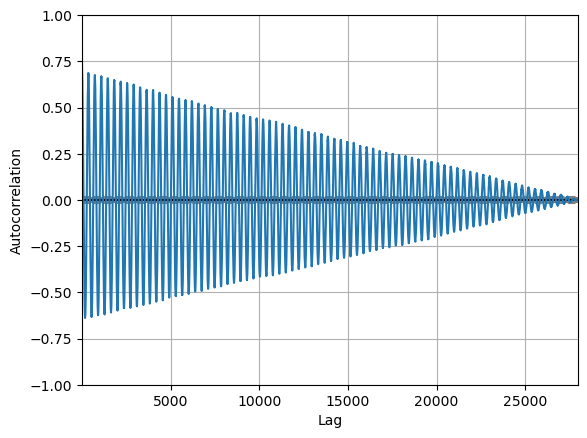

In [16]:
autocorrelation_plot(set1)
plt.show()

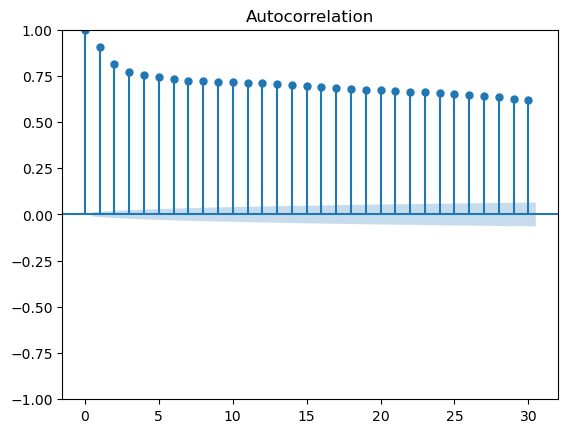

In [17]:
plot_acf(set1, lags=30)
plt.show()

In [146]:
print(adfuller(set1, autolag='AIC'))

(-13.49648590140769, 3.034821337491092e-25, 50, 27917, {'1%': -3.4305842623270513, '5%': -2.8616435373326374, '10%': -2.5668251098119317}, 172543.88248853557)


In [19]:
df.head(10)

,t-1,t+1
0,NaN,98.2
1,98.2,98.2
2,98.2,98.2
3,98.2,98.2
4,98.2,97.3
5,97.3,98.2
6,98.2,97.3
7,97.3,94.3
8,94.3,94.3
9,94.3,94.3


In [20]:
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [23]:
train_X

array([98.2, 98.2, 98.2, ..., 84. , 60.1, 59. ])

In [24]:
train_y

array([98.2, 98.2, 98.2, ..., 60.1, 59. , 59. ])

In [25]:
test_X

array([59. , 72. , 80.1, 82.9, 89.1, 89.1, 84. ])

In [26]:
test_y

array([72. , 80.1, 82.9, 89.1, 89.1, 84. , 81. ])

In [27]:
def model_persistence(x):
    return x

In [28]:
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 45.129


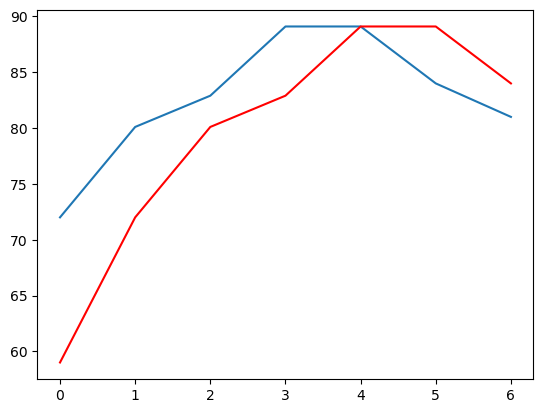

In [29]:
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

In [43]:
train

array([[98.2, 98.2],
       [98.2, 98.2],
       [98.2, 98.2],
       ...,
       [84. , 60.1],
       [60.1, 59. ],
       [59. , 59. ]])

In [122]:
X = set1.values
train, test = X[1:len(X)-3], X[len(X)-3:]
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 2.26554477e+00  8.53083329e-01 -2.20712773e-01  9.24731698e-02
  1.65280771e-02  3.13764967e-02  1.77759121e-02  8.62954521e-03
  1.54841680e-02  2.81558380e-02  9.15168026e-03  5.50849413e-03
  3.61865074e-02 -8.91055362e-04  1.07138444e-02  1.33533791e-02
  1.58382241e-03  1.30241874e-02 -4.79762320e-04  6.64689924e-03
  4.00939582e-03  1.55382984e-02 -4.83770718e-03  1.09144233e-02
  4.71695208e-03  4.28431461e-03  3.69790993e-03  3.40534511e-03
  1.25555632e-03 -8.45237408e-03]


In [123]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=86.493278, expected=89.100000
predicted=83.100892, expected=84.000000
predicted=81.186188, expected=81.000000


In [124]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 2.546
Test RMSE: 1.596


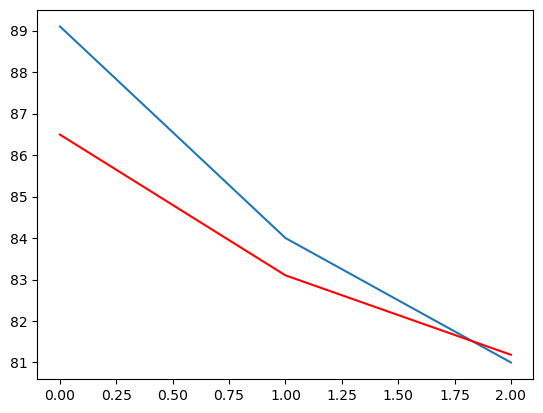

In [125]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [141]:
X = set1.values
train, test = X[1:len(X)-700], X[len(X)-700:]
window = 31
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params
coef

array([ 2.31791329e+00,  8.50869684e-01, -2.19048787e-01,  9.27123611e-02,
        1.48131289e-02,  3.11641308e-02,  1.97204073e-02,  7.27235463e-03,
        1.54899699e-02,  3.03698964e-02,  9.28229016e-03,  4.52635394e-03,
        3.80908367e-02, -2.79632206e-04,  8.85305324e-03,  1.37363264e-02,
        3.23221217e-03,  1.25764616e-02,  1.26392432e-03,  3.96657208e-03,
        6.79679110e-03,  1.53474455e-02, -4.76303861e-03,  1.17151712e-02,
        5.80272846e-03,  5.43031788e-03,  4.22240864e-03,  5.23236857e-03,
       -2.56078127e-03,  2.96124644e-03, -7.38119884e-03, -9.94928836e-03])

In [142]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)

predicted=87.206435, expected=88.000000
predicted=85.882459, expected=87.100000
predicted=85.606149, expected=90.000000
predicted=88.888589, expected=90.000000
predicted=88.110614, expected=75.000000
predicted=75.394113, expected=73.900000
predicted=78.437148, expected=91.900000
predicted=92.876599, expected=93.900000
predicted=89.877145, expected=93.900000
predicted=91.097679, expected=84.900000
predicted=83.549905, expected=87.100000
predicted=87.571633, expected=87.100000
predicted=86.548427, expected=90.000000
predicted=88.596144, expected=91.000000
predicted=88.945370, expected=91.000000
predicted=89.435525, expected=87.100000
predicted=85.835964, expected=86.000000
predicted=85.708182, expected=75.900000
predicted=77.853256, expected=82.900000
predicted=85.689819, expected=82.900000
predicted=83.394131, expected=82.000000
predicted=83.065285, expected=84.900000
predicted=85.742117, expected=82.000000
predicted=82.676408, expected=84.000000
predicted=85.146010, expected=84.900000


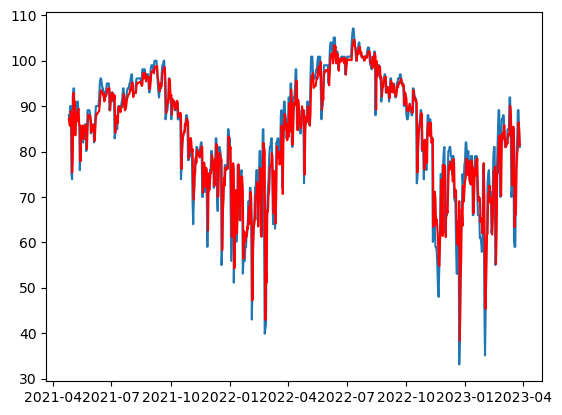

In [144]:
dates = set1.drop('max', axis=1).reset_index()[len(set1)-len(test):]
plt.plot(dates, test)
plt.plot(dates, predictions, color='red')
plt.show()